In [2]:
import numpy as np
from galpy import potential,df
from galpy.orbit import Orbit
from astropy import units as u

# Plotting
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.gridspec as gridspec
from matplotlib.colors import ListedColormap
from matplotlib import colors
from mpl_toolkits.mplot3d import Axes3D

# Scripts
from AxionStreams import plot as pl

In [3]:
# Set units

kpc = u.kpc
kms = u.km/u.s
deg = u.deg
Gyr = u.Gyr

In [4]:
N_samples = 20
nframes   = 400
T_Gyr     = 10

In [5]:
# Sampling pipeline
pot  = potential.NFWPotential()
distr_funct = df.isotropicNFWdf(pot=pot,rmax=200*kpc,vo=230*kms,ro=8.2*kpc)
samples = distr_funct.sample(n=N_samples,return_orbit=True)

Ndims = samples.dim()

Coords = np.zeros(shape=(nframes,Ndims,N_samples))

In [6]:
# Time series 
ts = np.linspace(0.0,T_Gyr*u.Gyr,nframes)

In [7]:
for i in range(N_samples):
    R   = samples[i].R()
    z   = samples[i].z()
    vR  = samples[i].vR()
    vT  = samples[i].vT()
    vz  = samples[i].vz()
    phi = samples[i].phi()
    o = Orbit(vxvv=[R*kpc,vR*kms,vT*kms,z*kpc,vz*kms,phi*deg])
    o.integrate(ts,potential.MWPotential2014)
    Coords[:,:,i] = np.column_stack((o.x(ts),o.y(ts),o.z(ts)))

In [8]:
Coords[:,:,0].shape

(400, 3)

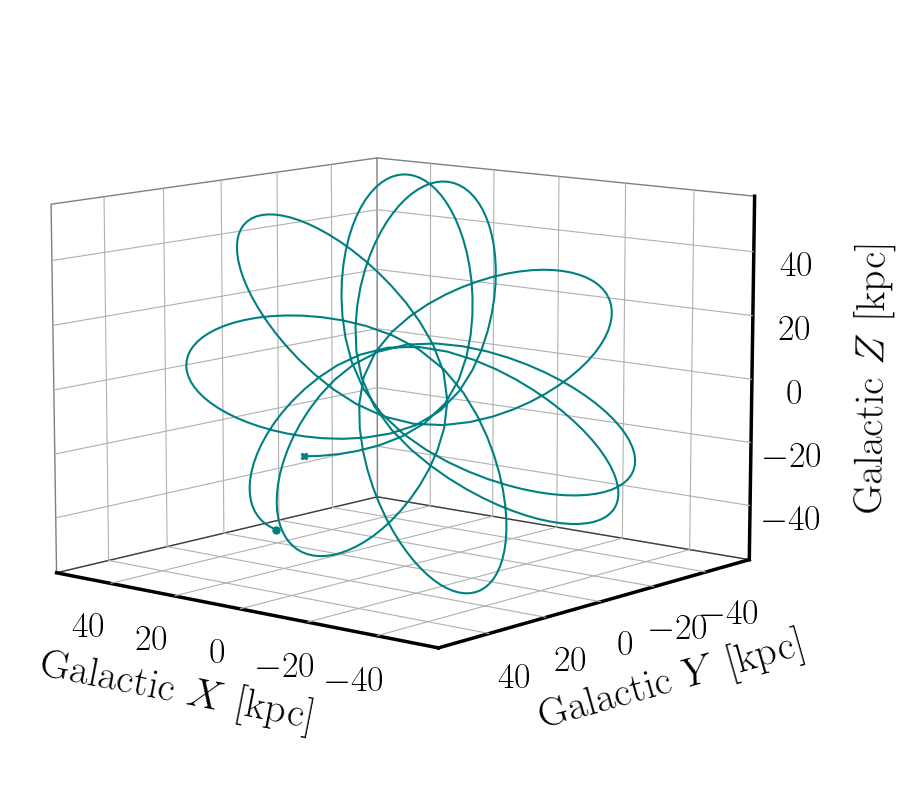

In [19]:
pl.plot_single_orbit(Coords[:,:,3],azim=10,sun=False,lim=55)

In [20]:
# def plot3D_double(Coords,Coords2,i,save=True,sun=True,lim=100.0):
#     xlim=lim
#     ylim=lim
#     zlim=lim
    
#     fig = plt.figure(figsize=(10,9))
#     ax = plt.axes(projection='3d')
#     ax.xaxis.pane.fill = False
#     ax.yaxis.pane.fill = False
#     ax.zaxis.pane.fill = False
#     ni = 50
#     xmin = -xlim
#     xmax = xlim
#     ymin = -ylim
#     ymax = ylim
#     zmin = 0.0
#     zmax = 3.0
#     ax.xaxis.pane.set_edgecolor('black')
#     ax.yaxis.pane.set_edgecolor('black')
#     ax.zaxis.pane.set_edgecolor('black')
#     ax.xaxis._axinfo['tick']['inward_factor'] = 0
#     ax.xaxis._axinfo['tick']['outward_factor'] = 0
#     ax.yaxis._axinfo['tick']['inward_factor'] = 0
#     ax.yaxis._axinfo['tick']['outward_factor'] = 0
#     ax.zaxis._axinfo['tick']['inward_factor'] = 0
#     ax.zaxis._axinfo['tick']['outward_factor'] = 0
#     ax.zaxis._axinfo['tick']['outward_factor'] = 0
#     ax.grid(False)
#     ax.set_xlim3d([-xlim,xlim])
#     ax.set_ylim3d([-ylim,ylim])
#     ax.set_zlim3d([-zlim,zlim])
#     ax.set_xlabel('Galactic $X$ [kpc]',fontsize=30,labelpad=30)
#     ax.set_ylabel('Galactic $Y$ [kpc]',fontsize=30,labelpad=30)
#     ax.set_zlabel('Galactic $Z$ [kpc]',fontsize=30,labelpad=30)
#     ax.tick_params(which='major',direction='in',width=3,length=10,right=True,top=True,pad=10,labelsize=26)
#     ax.tick_params(which='minor',direction='in',width=1,length=7,right=True,top=True)
#     #ax.plot(Coords[:,0,j],Coords[:,1,j],Coords[:,2,j],'-',alpha=0.5)
#     ax.plot(Coords[:,0],Coords[:,1],Coords[:,2],'-',alpha=1)
#     ax.plot(Coords2[:,0],Coords2[:,1],Coords2[:,2],'-',alpha=1)
    
#     if sun == True:
#         Sun = np.array([8.122,0.0,0.005])
#         o_sun1 = Orbit(vxvv=[Sun[0]*kpc,0.0*kms,232.0*kms,0.0*kpc,0.0*kms,0.0*deg]).flip()
#         ts = np.linspace(0.0,250.0*u.Myr,200)
#         o_sun1.integrate(ts,potential.MWPotential2014)
#         Orb0 = np.column_stack((o_sun1.x(ts),o_sun1.y(ts),o_sun1.z(ts)))
#         ax.plot(Orb0[:,0],Orb0[:,1],Orb0[:,2],'k-')
#     plt.show()
#     if save == True:
#         fig.savefig('3D/5_10/fig_%.3d'%i,bbox_inches='tight')

In [21]:
# plot3D_single(Coords[:,:,10],0,save=False)

In [22]:
# plot3D_double(Coords[:-1,:,10],Coords[:-1,:,5],-1)

In [23]:
# for j in range(nframes):
#     plot3D_double(Coords[:j,:,5],Coords[:j,:,10],j)
#plot3D_single(Coords[:j,:,1],j)

In [ ]:
# Check profile here

dP,rb = histogram(R,bins=100,range=[0,rmax]) 
rc = (rb[0:-1]+rb[1:])/2
dr = rb[1]-rb[0]
rho = (1/(4*pi*rc**2))*(dP/dr)

In [25]:
## Some attributes/methods of orbit class 
## samples can be replaced by any 'orbit' object

# Coordinates

# samples.r() # Spherical radius at time t
# samples.R() # Cylindrical radius at time t
# samples.theta()
# samples.x()
# samples.y()
# samples.z()

# # Velocities 

# samples.vx()
# samples.vy()
# samples.vz()
# samples.vphi() # Angular velocity

# # Time
# samples.time()

# Periods (needs to be integrated first)

# samples.Tr()
# samples.Tp()

#samples.dim()  # dimensions
#samples.dist() # return distance from the observer in kpc

# Integration 

# samples.integrate(t, pot, method='symplec4_c', progressbar=True, dt=None, numcores=2, force_map=False)

In [ ]:
# np= potential.NFWPotential(amp=1.2,a=2.3)
# #sam = sphericaldf.sample(R=None, z=None, phi=None, n=1, return_orbit=True, rmin=0.0)
# ndf= isotropicNFWdf(pot=np)
# # sample
# sam= ndf.sample(n=100)
# print(numpy.std(sam[numpy.fabs(sam.r()-1.2) < 0.1].vr()))
# # 0.2156787374302913
# # Compute vel. dispersion
# #print(ndf.sigmar(1.2))

In [ ]:
# from galpy.orbit import Orbit
# from galpy.potential import MWPotential2014
# import numpy
# import astropy.units as u
# ts= numpy.linspace(0.,1.,1001)*u.Gyr
# o = Orbit() 
# o.integrate(ts,MWPotential2014)
# o.plot()